In [1]:
import numpy as np
import pandas as pd

In [2]:
# importing the data
file = r'~/Downloads/creditcard_sampledata_2.csv'

In [3]:
data = pd.read_csv(file)

In [4]:
data.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [5]:
data.shape

(7300, 31)

In [6]:
a = data['Class'].value_counts()
a

0    7000
1     300
Name: Class, dtype: int64

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import BorderlineSMOTE
# from imblearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN

# pip install -U imbalanced-learn

In [8]:
from sklearn.metrics import mean_absolute_percentage_error

In [9]:
# Define the resampling method
method = SMOTE()

In [10]:
# prep data function
def prep_data(df:pd.DataFrame):
    X = df.iloc[:,1:30].values
    y = df.Class.values
    return (X,y)
    
    

In [11]:
X,y = prep_data(data)

In [12]:
X.shape

(7300, 29)

In [13]:
# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X,y)

In [14]:
def plot_graph(x:np.ndarray, y:np.ndarray):
    plt.scatter(x[y==0,0],x[y==0,2], label='Class 0')
    plt.scatter(x[y==1,0],x[y==1,2], label='Class 1', c='r')
    plt.legend()
    return plt.show()

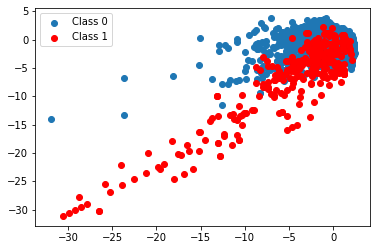

In [15]:
plot_graph(X,y)

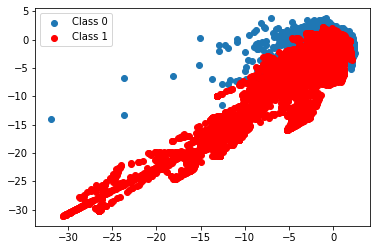

In [16]:
plot_graph(X_resampled,y_resampled)

In [17]:
X.shape

(7300, 29)

In [18]:
y.shape

(7300,)

In [19]:
X_resampled.shape

(14000, 29)

In [20]:
y_resampled.shape

(14000,)

# Logistic Regression

In [53]:
# Step 1 - modelling - split training and testing set
# Step 1: split the features and labels into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [54]:
X_train.shape

(5840, 29)

In [55]:
# Step 2 - define the model to be used
# Step 2: Define which model to use
model = LogisticRegression()

In [56]:
# Step 3: Fit the model to the training data
model.fit(X_train, y_train)

/Users/urvivaidya/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
# Step 4: Obtain model predictions from the test data
y_predicted = model.predict(X_test)

In [58]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
# Step 5: Compare y_test to predictions and obtain performance metrics

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1396
           1       0.96      0.81      0.88        64

    accuracy                           0.99      1460
   macro avg       0.98      0.91      0.94      1460
weighted avg       0.99      0.99      0.99      1460

Confusion matrix:
 [[1394    2]
 [  12   52]]


In [60]:
y_test.shape

(1460,)

In [61]:
# checking accuracy
print(f'Accuracy Score:\n{accuracy_score(y_test, y_predicted):0.3f}')

Accuracy Score:
0.990


# Random Forests

In [63]:
# Step 1 - modelling - split training and testing set
# Step 1: split the features and labels into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [64]:
# Step 2 - define the model to be used
# Step 2: Define which model to use
model = RandomForestClassifier()

In [65]:
# Step 3: Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
# Step 4: Obtain model predictions from the test data
y_predicted = model.predict(X_test)

In [67]:
# Step 5: Compare y_test to predictions and obtain performance metrics

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1403
           1       0.98      0.82      0.90        57

    accuracy                           0.99      1460
   macro avg       0.99      0.91      0.95      1460
weighted avg       0.99      0.99      0.99      1460

Confusion matrix:
 [[1402    1]
 [  10   47]]


In [68]:
# checking accuracy
print(f'Accuracy Score:\n{accuracy_score(y_test, y_predicted):0.3f}')

Accuracy Score:
0.992


# Random Forests with n_estimator

In [39]:
# Step 2 - define the model to be used
# Step 2: Define which model to use
model = RandomForestClassifier(n_estimators = 10)

In [40]:
# Step 3: Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [41]:
# Step 4: Obtain model predictions from the test data
y_predicted = model.predict(X_test)

In [42]:
# Step 5: Compare y_test to predictions and obtain performance metrics

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1400
           1       0.92      0.80      0.86        60

    accuracy                           0.99      1460
   macro avg       0.96      0.90      0.93      1460
weighted avg       0.99      0.99      0.99      1460

Confusion matrix:
 [[1396    4]
 [  12   48]]


In [ ]:
# checking accuracy
print(f'Accuracy Score:\n{accuracy_score(y_test, y_predicted):0.3f}')

# Random Forests with random state

In [47]:
# Step 2 - define the model to be used
# Step 2: Define which model to use
model = RandomForestClassifier(n_estimators = 10, random_state=5)

In [48]:
# Step 3: Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=5)

In [49]:
# Step 4: Obtain model predictions from the test data
y_predicted = model.predict(X_test)

In [50]:
# Step 5: Compare y_test to predictions and obtain performance metrics

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1400
           1       0.92      0.78      0.85        60

    accuracy                           0.99      1460
   macro avg       0.96      0.89      0.92      1460
weighted avg       0.99      0.99      0.99      1460

Confusion matrix:
 [[1396    4]
 [  13   47]]


In [52]:
# checking accuracy
print(f'Accuracy Score:\n{accuracy_score(y_test, y_predicted):0.3f}')

Accuracy Score:
0.988


# Funtion to use multiple models

In [72]:
def getModelResults(X, y, model, ts):
    
    # Step 1: splitting the set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts)
    
    # fitting the model
    model.fit(X_train, y_train)
    
    # Step 4: Obtain model predictions from the test data
    y_predicted = model.predict(X_test)
    
    # Step 5: Compare y_test to predictions and obtain performance metrics

    # Print the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_predicted))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n', conf_mat)
    

In [83]:
# calling the function - step 2 is the input
m = RandomForestClassifier()
getModelResults(X,y,m,0.2)


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1405
           1       1.00      0.87      0.93        55

    accuracy                           1.00      1460
   macro avg       1.00      0.94      0.96      1460
weighted avg       1.00      1.00      1.00      1460

Confusion matrix:
 [[1405    0]
 [   7   48]]


In [76]:
# calling the function - step 2 is the input
m = RandomForestClassifier()
getModelResults(X,y,m,0.3)


Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2107
           1       0.96      0.84      0.90        83

    accuracy                           0.99      2190
   macro avg       0.98      0.92      0.95      2190
weighted avg       0.99      0.99      0.99      2190

Confusion matrix:
 [[2104    3]
 [  13   70]]


In [75]:
# Change the model options
m = RandomForestClassifier(bootstrap=True,
class_weight={0:1, 1:12},
criterion='entropy',

max_depth=10,

min_samples_leaf=10,

n_estimators=20,
n_jobs=-1,
random_state=5)

# calling the function
getModelResults(X,y,m,0.2)

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1394
           1       0.95      0.83      0.89        66

    accuracy                           0.99      1460
   macro avg       0.97      0.92      0.94      1460
weighted avg       0.99      0.99      0.99      1460

Confusion matrix:
 [[1391    3]
 [  11   55]]


In [77]:
# Change the model options
m = RandomForestClassifier(bootstrap=True,
class_weight={0:1, 1:12},
criterion='entropy',

max_depth=10,

min_samples_leaf=10,

n_estimators=20,
n_jobs=-1,
random_state=5)

# calling the function
getModelResults(X,y,m,0.3)

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2102
           1       0.89      0.83      0.86        88

    accuracy                           0.99      2190
   macro avg       0.94      0.91      0.93      2190
weighted avg       0.99      0.99      0.99      2190

Confusion matrix:
 [[2093    9]
 [  15   73]]


In [78]:
# calling the function - step 2 is the input
m = DecisionTreeClassifier()
getModelResults(X,y,m,0.2)

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1386
           1       0.88      0.82      0.85        74

    accuracy                           0.99      1460
   macro avg       0.94      0.91      0.92      1460
weighted avg       0.99      0.99      0.99      1460

Confusion matrix:
 [[1378    8]
 [  13   61]]


In [79]:
# calling the function - step 2 is the input
m = DecisionTreeClassifier()
getModelResults(X,y,m,0.3)

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2089
           1       0.85      0.83      0.84       101

    accuracy                           0.99      2190
   macro avg       0.92      0.91      0.92      2190
weighted avg       0.99      0.99      0.99      2190

Confusion matrix:
 [[2074   15]
 [  17   84]]


In [85]:
m = LogisticRegression(max_iter = 100)
getModelResults(X,y,m,0.2)

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1404
           1       0.98      0.80      0.88        56

    accuracy                           0.99      1460
   macro avg       0.99      0.90      0.94      1460
weighted avg       0.99      0.99      0.99      1460

Confusion matrix:
 [[1403    1]
 [  11   45]]


/Users/urvivaidya/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
    # We split our testing and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # We use the Randon Forest Classifier - optionally with variables
    model = RandomForestClassifier()
    
    # We fit the model on our data
    model.fit(X_train, y_train)
    
    # We get model predictions from the test data
    y_predicted = model.predict(X_test)